In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [158]:
df= pd.read_csv('heart_2020_cleaned.csv')
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [159]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [161]:
df.describe().T

count       mean       std    min    25%    50%    75%  \
BMI             319795.0  28.325399  6.356100  12.02  24.03  27.34  31.42   
PhysicalHealth  319795.0   3.371710  7.950850   0.00   0.00   0.00   2.00   
MentalHealth    319795.0   3.898366  7.955235   0.00   0.00   0.00   3.00   
SleepTime       319795.0   7.097075  1.436007   1.00   6.00   7.00   8.00   

                  max  
BMI             94.85  
PhysicalHealth  30.00  
MentalHealth    30.00  
SleepTime       24.00

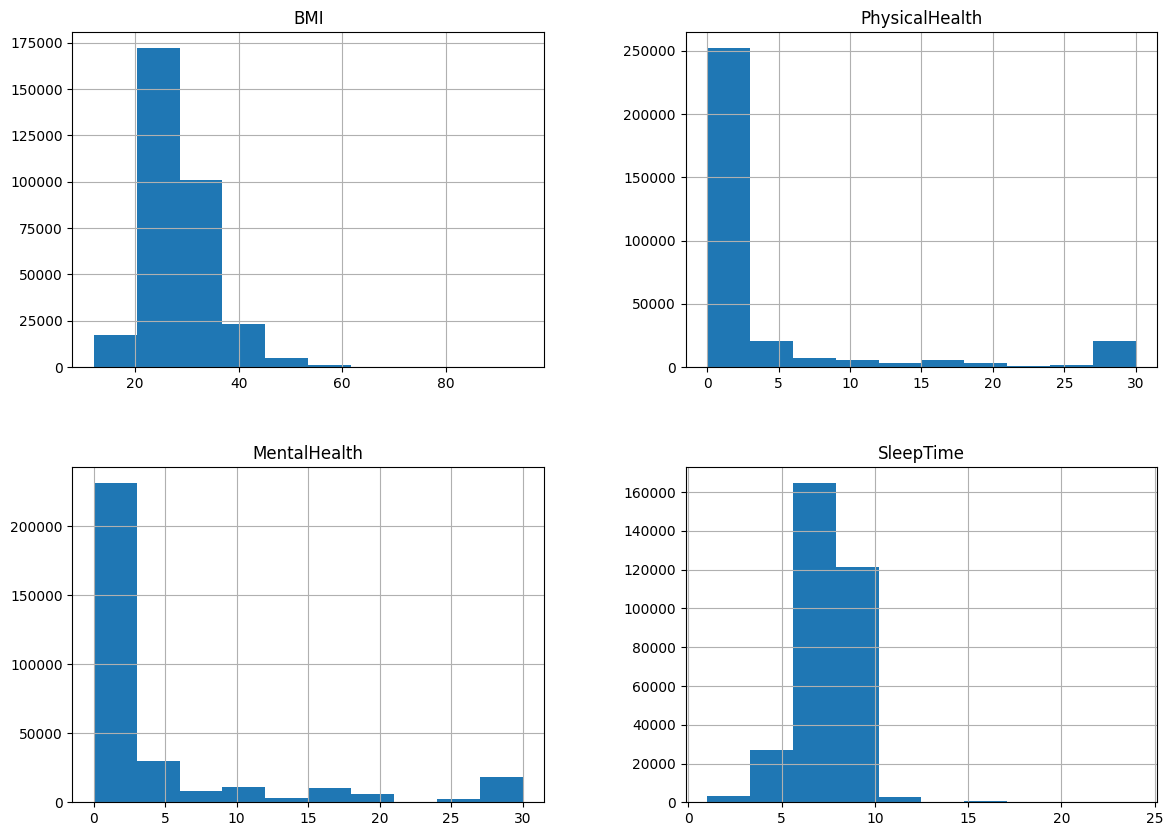

In [162]:
df.hist(bins = 10 , figsize= (14,10))
plt.show()

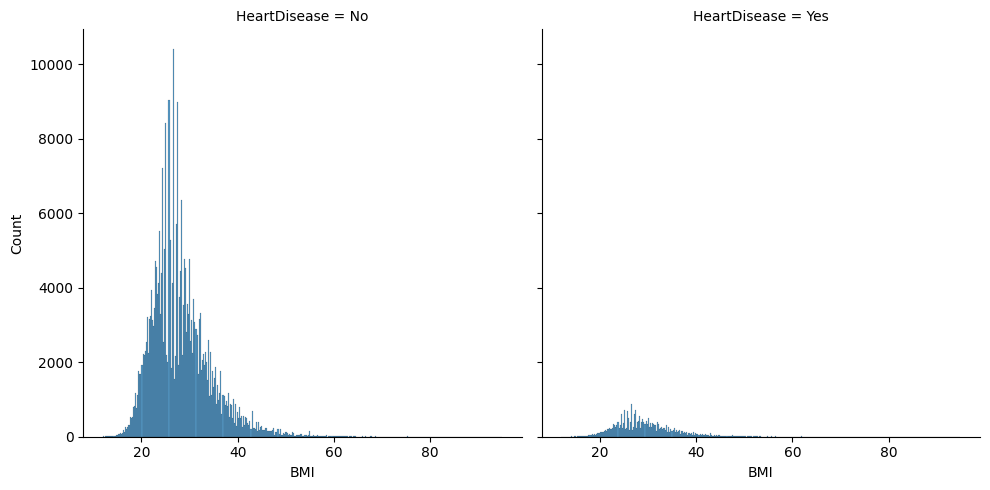

In [163]:
sns.displot(df, x="BMI", col="HeartDisease")

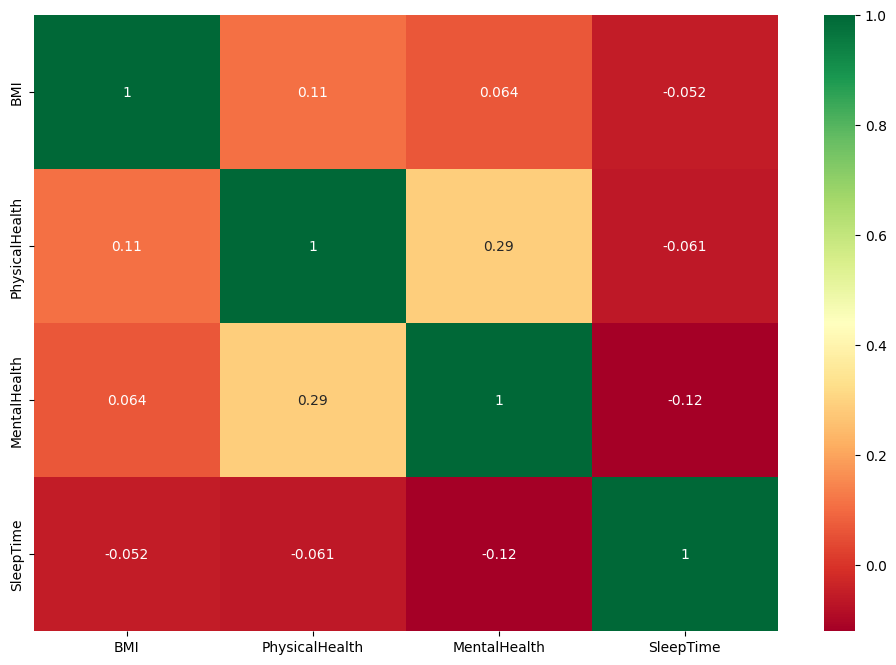

In [164]:
plt.figure(figsize=(12,8))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

<Axes: xlabel='Smoking', ylabel='HeartDisease'>

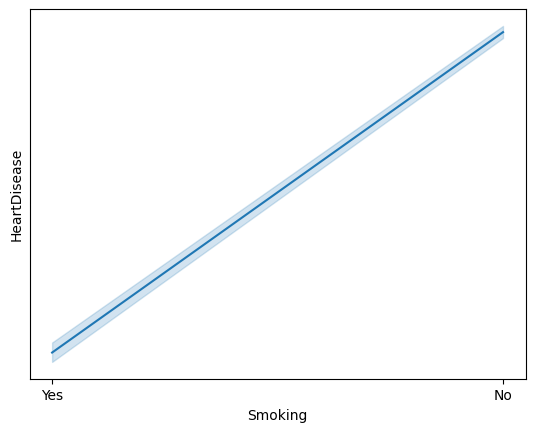

In [165]:
sns.lineplot(x="Smoking", y="HeartDisease", data=df)

<Axes: xlabel='GenHealth', ylabel='BMI'>

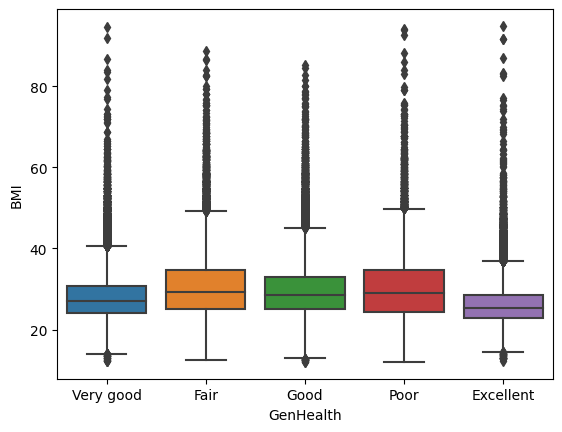

In [166]:
sns.boxplot(x = 'GenHealth', y = 'BMI', data = df)


In [167]:
df['HeartDisease'].value_counts()/df.shape[0]

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64

In [168]:
# class count
count_class_no, count_class_yes = df['HeartDisease'].value_counts()

# divide the class
df_class_yes = df[df['HeartDisease'] == 'Yes']
df_class_no = df[df['HeartDisease'] == 'No']

Random under-sampling
No     27373
Yes    27373
Name: HeartDisease, dtype: int64


<Axes: title={'center': 'Count (HeartDisease)'}>

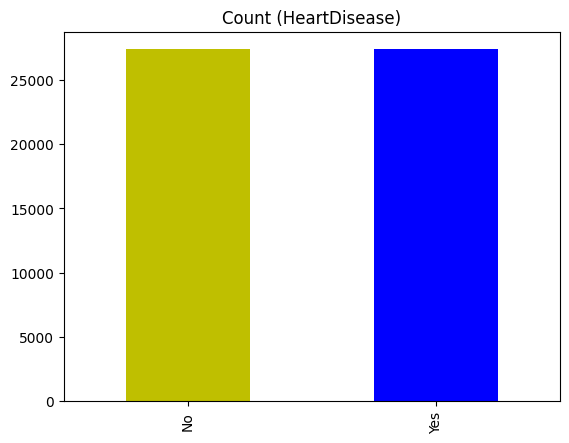

In [169]:
df_class_no_under = df_class_no.sample(count_class_yes)
df_test_under = pd.concat([df_class_no_under, df_class_yes], axis=0)

print('Random under-sampling')
print(df_test_under['HeartDisease'].value_counts())
df_test_under['HeartDisease'].value_counts().plot(kind='bar', title='Count (HeartDisease)', color=['y', 'b'])

Random over-sampling
No     292422
Yes    292422
Name: HeartDisease, dtype: int64


<Axes: title={'center': 'Count (HeartDisease)'}>

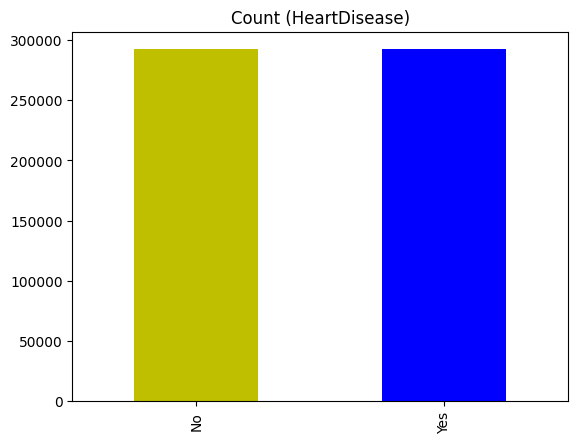

In [170]:
df_class_yes_over = df_class_yes.sample(count_class_no, replace=True)
df_test_over = pd.concat([df_class_no, df_class_yes_over], axis=0)

print('Random over-sampling')
print(df_test_over['HeartDisease'].value_counts())

df_test_over['HeartDisease'].value_counts().plot(kind='bar', title='Count (HeartDisease)', color=['y', 'b'])

In [171]:
df.describe(include=object)

HeartDisease Smoking AlcoholDrinking  Stroke DiffWalking     Sex  \
count        319795  319795          319795  319795      319795  319795   
unique            2       2               2       2           2       2   
top              No      No              No      No          No  Female   
freq         292422  187887          298018  307726      275385  167805   

       AgeCategory    Race Diabetic PhysicalActivity  GenHealth  Asthma  \
count       319795  319795   319795           319795     319795  319795   
unique          13       6        4                2          5       2   
top          65-69   White       No              Yes  Very good      No   
freq         34151  245212   269653           247957     113858  276923   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top               No         No  
freq          308016     289976

In [172]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [173]:
cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [174]:
df['Race'].unique()

array([5, 2, 1, 0, 4, 3])

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x=df.drop('HeartDisease',axis=1).values
y=df['HeartDisease'].values

In [178]:
x_train ,x_test ,y_train ,y_test=train_test_split(x,y ,test_size=0.25,random_state=42)

In [179]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features=4)
rf.fit(x_train , y_train)
rf.score(x_train , y_train)
rf.score(x_test , y_test)

0.9132196775444346

In [180]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2' , C=0.5)
lr.fit(x_train , y_train )
lr.score(x_train , y_train)
lr.score(x_test , y_test )

0.9137575204192673

In [181]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train , y_train)
dtree.score(x_train , y_train)
dtree.score(x_test , y_test)

0.8624623197288271

In [182]:
#for decision tree
import pickle as pk

pk.dump(dtree,open('dtree.sav','wb'))
#for random forest dumping
pk.dump(rf,open('rfc.sav','wb'))


In [183]:

DT=pk.load(open('dtree.sav','rb'))
RFC=pk.load(open('rfc.sav','rb'))

names=["dtree","rf"]

In [184]:
#pip install customtkinter

In [185]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [186]:
x_train.shape

(239846, 17)

<Axes: xlabel='Sex', ylabel='count'>

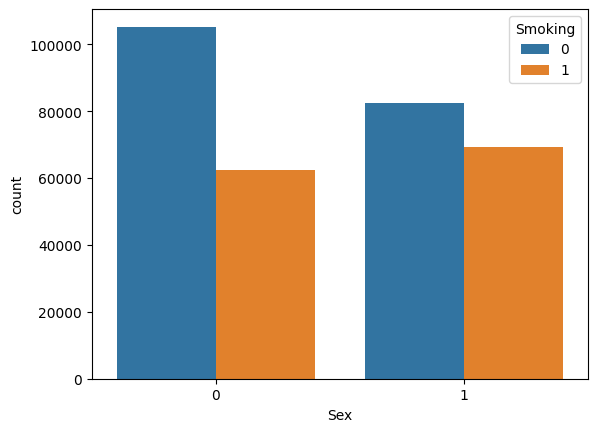

In [187]:
sns.countplot(x ='Sex',hue='Smoking', data =df)

<Axes: xlabel='Smoking', ylabel='AgeCategory'>

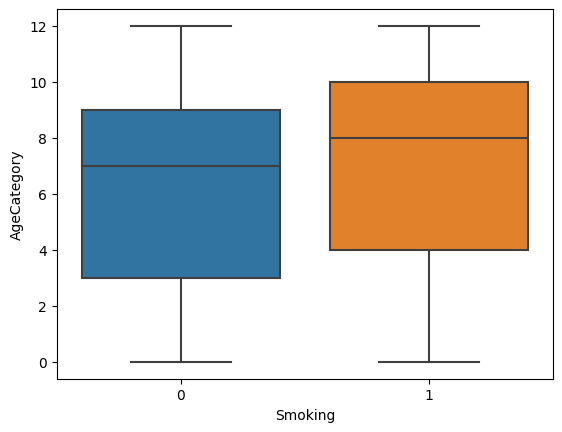

In [188]:
sns.boxplot(x = 'Smoking', y = 'AgeCategory', data = df)

In [189]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
from tkinter import *
import tkinter.messagebox
import customtkinter
import sys
from PIL import Image, ImageTk# <- import PIL for the images
from tkinter.ttk import *
import matplotlib as plt
import urllib.request
from PIL import Image
customtkinter.set_appearance_mode("light")

customtkinter.set_default_color_theme("blue")

top=customtkinter.CTk()


top.geometry("1920x1080")
top.title("heart stroke prediction")  
def change_mode():
        if check_box_2.get() == 1:
            customtkinter.set_appearance_mode("dark")
        else:
            customtkinter.set_appearance_mode("light")

check_box_2 = customtkinter.CTkCheckBox(master=top,text="Toggle",command=change_mode)
check_box_2.grid(row=7, column=0, pady=10, padx=20, sticky="w")

def do_something():
    tkinter.messagebox.showinfo("ERROR"," 0 levels that means you are not alive anymore " u" \u2620 " u" \u2620...")
def button1():
    top1=customtkinter.CTkToplevel()
    customtkinter.set_appearance_mode("light")
    top1.geometry("1600x1080")
    top1.title("Diabetes report")
    X1=float(entry.get())
    X2=float(entry1.get())
    X3=float(entry2.get())
    X4=float(entry3.get())
    X5=float(entry4.get())
    X6=float(entry5.get())
    X7=float(entry6.get())
    X8=float(entry7.get())
    X9=float(entry8.get())
    X10=float(entry10.get())
    X11=float(entry11.get())
    X12=float(entry12.get())
    X13=float(entry13.get())
    X14=float(entry14.get())
    X15=float(entry15.get())
    X16=float(entry16.get())
    X17=float(entry17.get())
    
    
    ha = np.array([[X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,x13,x14,x15,x17]])
    
    pred1=DT.predict(ha)
    pred2=RFC.predict(ha)
    print(pred1,pred2)
    k1="👉According to the rfc algorithm ,you have a chance of being {pro} ".format( pro="LOW RISK" if int(pred1)==0 else "HIGH RISK" )
    k2="👉According to the dtree algorithm ,you have a chance of being {pro} ".format( pro="LOW RISK" if int(pred2)==0 else "HIGH RISK")
   
        
    def change_mode1():
        if check_box_1.get() == 0:
            customtkinter.set_appearance_mode("light")
            
            
        else:
            customtkinter.set_appearance_mode("dark")
            
    
       
    check_box_1 = customtkinter.CTkCheckBox(master=top1,text="T",command=change_mode1)
    check_box_1.grid(row=7, column=5, pady=10, padx=20, sticky="w")

    
    
def button():
    if entry.get()==str(0) :
        do_something()
    elif  len(entry.get())==0:
        tkinter.messagebox.showinfo("ERROR","PLEASE ENTER THE VALUES "u"\U0001F643 "u"\U0001F643")

    else:
        X1=float(entry.get())
        X2=float(entry1.get())
        X3=float(entry2.get())
        X4=float(entry3.get())
        X5=float(entry4.get())
        X6=float(entry5.get())
        X7=float(entry6.get())
        X8=float(entry7.get())
        X9=float(entry8.get())
        X10=float(entry10.get())
        X11=float(entry11.get())
        X12=float(entry12.get())
        X13=float(entry13.get())
        X14=float(entry14.get())
        X15=float(entry15.get())
        X16=float(entry16.get())
        X17=float(entry17.get())
    
        ha = np.array([[X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17]])
        pred1=DT.predict(ha)
        pred2=RFC.predict(ha)
        
        
        res=pred1
        RES1=pred2

        print("results")
        print(pred1,pred2)
        print(X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12)
        if RES1==1:
            color="#5EA880"
            outputLabel=customtkinter.CTkLabel(master=top,text="you dont have RISK At All",width=350,height=30,corner_radius=10,fg_color=("white", "gray20"),text_color=color)
            outputLabel.place(relx=0.5, rely=0.75,anchor=tkinter.CENTER)
        else:
            color="#FF0000"
            outputLabel=customtkinter.CTkLabel(master=top,text="you are closest to the RISK",width=350,height=30,corner_radius=10,fg_color=("white", "gray20"),text_color=color)
            outputLabel.place(relx=0.5, rely=0.75,anchor=tkinter.CENTER)
        if res==1:
            color="#5EA880"
            outputLabel=customtkinter.CTkLabel(master=top,text="you dont have RISK At All",width=450,height=40,corner_radius=10,fg_color=("white", "gray20"),text_color=color)
            outputLabel.place(relx=0.5, rely=0.75,anchor=tkinter.CENTER)
        else:
            color="#FF0000"
            outputLabel=customtkinter.CTkLabel(master=top,text="you are closest to the RISK",width=450,height=40,corner_radius=10,fg_color=("white", "gray20"),text_color=color)
            outputLabel.place(relx=0.5, rely=0.75,anchor=tkinter.CENTER)
            
        

frame = customtkinter.CTkFrame(master=top,width=320,height=720,corner_radius=10)
frame.place(relx=0.5, rely=0.5, anchor=tkinter.CENTER)

frame1 = customtkinter.CTkFrame(master=top,width=1080,height=300,corner_radius=10)
frame1.place(relx=0.5, rely=0.5, anchor=tkinter.CENTER)

label = customtkinter.CTkLabel(master=top,text="BMI",width=100,height=25,corner_radius=5)

label.place(relx=0.25, rely=0.14, anchor=tkinter.CENTER)
entry = customtkinter.CTkEntry(master=top,placeholder_text="enter BMI",width=250,height=25,corner_radius=10)
entry.place(relx=0.25, rely=0.19, anchor=tkinter.CENTER)
text1 = entry.get()


label1 = customtkinter.CTkLabel(master=top,text="Smoking",width=100,height=25,corner_radius=5)
label1.place(relx=0.25, rely=0.23, anchor=tkinter.CENTER)
entry1 = customtkinter.CTkEntry(master=top,placeholder_text="enter 1 if smoke else 0",width=250,height=25,corner_radius=10)
entry1.place(relx=0.25, rely=0.28, anchor=tkinter.CENTER)
text2 = entry1.get()

label2 = customtkinter.CTkLabel(master=top,text="AlcoholDrinking",width=100,height=25,corner_radius=5)
label2.place(relx=0.25, rely=0.33, anchor=tkinter.CENTER)
entry2 = customtkinter.CTkEntry(master=top,placeholder_text="enter 1 if drink else 0",width=250,height=25,corner_radius=10)
entry2.place(relx=0.25, rely=0.38, anchor=tkinter.CENTER)
text3 = entry2.get()

label3 = customtkinter.CTkLabel(master=top,text="Stroke",width=100,height=25,corner_radius=5)
label3.place(relx=0.49, rely=0.14, anchor=tkinter.CENTER)
entry3 = customtkinter.CTkEntry(master=top,placeholder_text="enter 1 if yes else 0",width=250,height=25,corner_radius=10)
entry3.place(relx=0.49, rely=0.19, anchor=tkinter.CENTER)
text4 = entry3.get()

label4 = customtkinter.CTkLabel(master=top,text="PhysicalHealth",width=100,height=25,corner_radius=5)
label4.place(relx=0.49, rely=0.23, anchor=tkinter.CENTER)
entry4 = customtkinter.CTkEntry(master=top,placeholder_text="enter value",width=250,height=25,corner_radius=10)
entry4.place(relx=0.49, rely=0.28, anchor=tkinter.CENTER)
text5 = entry4.get()

label5 = customtkinter.CTkLabel(master=top,text="MentalHealth",width=100,height=25,corner_radius=5)
label5.place(relx=0.49, rely=0.33, anchor=tkinter.CENTER)
entry5 = customtkinter.CTkEntry(master=top,placeholder_text="enter value",width=250,height=25,corner_radius=10)
entry5.place(relx=0.49, rely=0.38, anchor=tkinter.CENTER)
text6 = entry5.get()

label6 = customtkinter.CTkLabel(master=top,text="DiffWalking",width=100,height=25,corner_radius=5)
label6.place(relx=0.25, rely=0.43, anchor=tkinter.CENTER)
entry6 = customtkinter.CTkEntry(master=top,placeholder_text="enter 1 if yes. else 0",width=250,height=25,corner_radius=10)
entry6.place(relx=0.25, rely=0.48, anchor=tkinter.CENTER)
text7= entry6.get()

label7 = customtkinter.CTkLabel(master=top,text="Sex",width=100,height=25,corner_radius=5)
label7.place(relx=0.49, rely=0.43, anchor=tkinter.CENTER)
entry7 = customtkinter.CTkEntry(master=top,placeholder_text="enter 1 if male. else 0",width=250,height=25,corner_radius=10)
entry7.place(relx=0.49, rely=0.48, anchor=tkinter.CENTER)
text8= entry7.get()

label8 = customtkinter.CTkLabel(master=top,text="AgeCategory",width=100,height=25,corner_radius=5)
label8.place(relx=0.75, rely=0.43, anchor=tkinter.CENTER)
entry8 = customtkinter.CTkEntry(master=top,placeholder_text="enter age",width=250,height=25,corner_radius=10)
entry8.place(relx=0.75, rely=0.48, anchor=tkinter.CENTER)
text9= entry8.get()

label10 = customtkinter.CTkLabel(master=top,text="Race",width=100,height=25,corner_radius=5)
label10.place(relx=0.75, rely=0.14, anchor=tkinter.CENTER)
entry10 = customtkinter.CTkEntry(master=top,placeholder_text="enter value",width=250,height=25,corner_radius=10)
entry10.place(relx=0.75, rely=0.19, anchor=tkinter.CENTER)
text11 = entry10.get()

label11 = customtkinter.CTkLabel(master=top,text="Diabetic",width=100,height=25,corner_radius=5)
label11.place(relx=0.75, rely=0.23, anchor=tkinter.CENTER)
entry11 = customtkinter.CTkEntry(master=top,placeholder_text="enter 0 or >0",width=250,height=25,corner_radius=10)
entry11.place(relx=0.75, rely=0.28, anchor=tkinter.CENTER)
text12 = entry11.get()

label12 = customtkinter.CTkLabel(master=top,text="PhysicalActivity",width=100,height=25,corner_radius=5)
label12.place(relx=0.75, rely=0.33, anchor=tkinter.CENTER)
entry12 = customtkinter.CTkEntry(master=top,placeholder_text="enter 1 if yes. else 0",width=250,height=25,corner_radius=10)
entry12.place(relx=0.75, rely=0.38, anchor=tkinter.CENTER)
text13 = entry12.get()

label13 = customtkinter.CTkLabel(master=top,text="GenHealth",width=100,height=25,corner_radius=5)
label13.place(relx=0.25, rely=0.53, anchor=tkinter.CENTER)
entry13 = customtkinter.CTkEntry(master=top,placeholder_text="enter Genhealth",width=250,height=25,corner_radius=10)
entry13.place(relx=0.25, rely=0.58, anchor=tkinter.CENTER)
text14= entry13.get()

label14 = customtkinter.CTkLabel(master=top,text="SleepTime",width=100,height=25,corner_radius=5)
label14.place(relx=0.49, rely=0.53, anchor=tkinter.CENTER)
entry14 = customtkinter.CTkEntry(master=top,placeholder_text="enter sleeptime",width=250,height=25,corner_radius=10)
entry14.place(relx=0.49, rely=0.58, anchor=tkinter.CENTER)
text15= entry14.get()

label15 = customtkinter.CTkLabel(master=top,text="Asthma",width=100,height=25,corner_radius=5)
label15.place(relx=0.75, rely=0.53, anchor=tkinter.CENTER)
entry15 = customtkinter.CTkEntry(master=top,placeholder_text="enter 1 if yes. else 0",width=250,height=25,corner_radius=10)
entry15.place(relx=0.75, rely=0.58, anchor=tkinter.CENTER)
text16= entry15.get()

label16 = customtkinter.CTkLabel(master=top,text="KidneyDisease",width=100,height=25,corner_radius=5)
label16.place(relx=0.25, rely=0.63, anchor=tkinter.CENTER)
entry16 = customtkinter.CTkEntry(master=top,placeholder_text="enter 1 if yes. else 0",width=250,height=25,corner_radius=10)
entry16.place(relx=0.25, rely=0.68, anchor=tkinter.CENTER)
text17= entry16.get()

label17 = customtkinter.CTkLabel(master=top,text="SkinCancer",width=100,height=25,corner_radius=5)
label17.place(relx=0.49, rely=0.63, anchor=tkinter.CENTER)
entry17 = customtkinter.CTkEntry(master=top,placeholder_text="enter 1 if yes. else 0",width=250,height=25,corner_radius=10)
entry17.place(relx=0.49, rely=0.68, anchor=tkinter.CENTER)
text18= entry17.get()

button=customtkinter.CTkButton(top,text="CHECK",compound=("right"),command=button,fg_color=( "lightgray","gray"),hover_color= "#458577",border_width=3,corner_radius=6)
button.place(relx=0.75, rely=0.68,anchor=tkinter.CENTER)




top.mainloop()



results
[0] [0]
26.0 1.0 1.0 0.0 10.0 10.0 0.0 1.0 29.0 1.0 0.0 1.0


In [33]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [34]:
FEATURE_NAMES=list(df.columns)
FEATURE_NAMES.pop(0)

'HeartDisease'

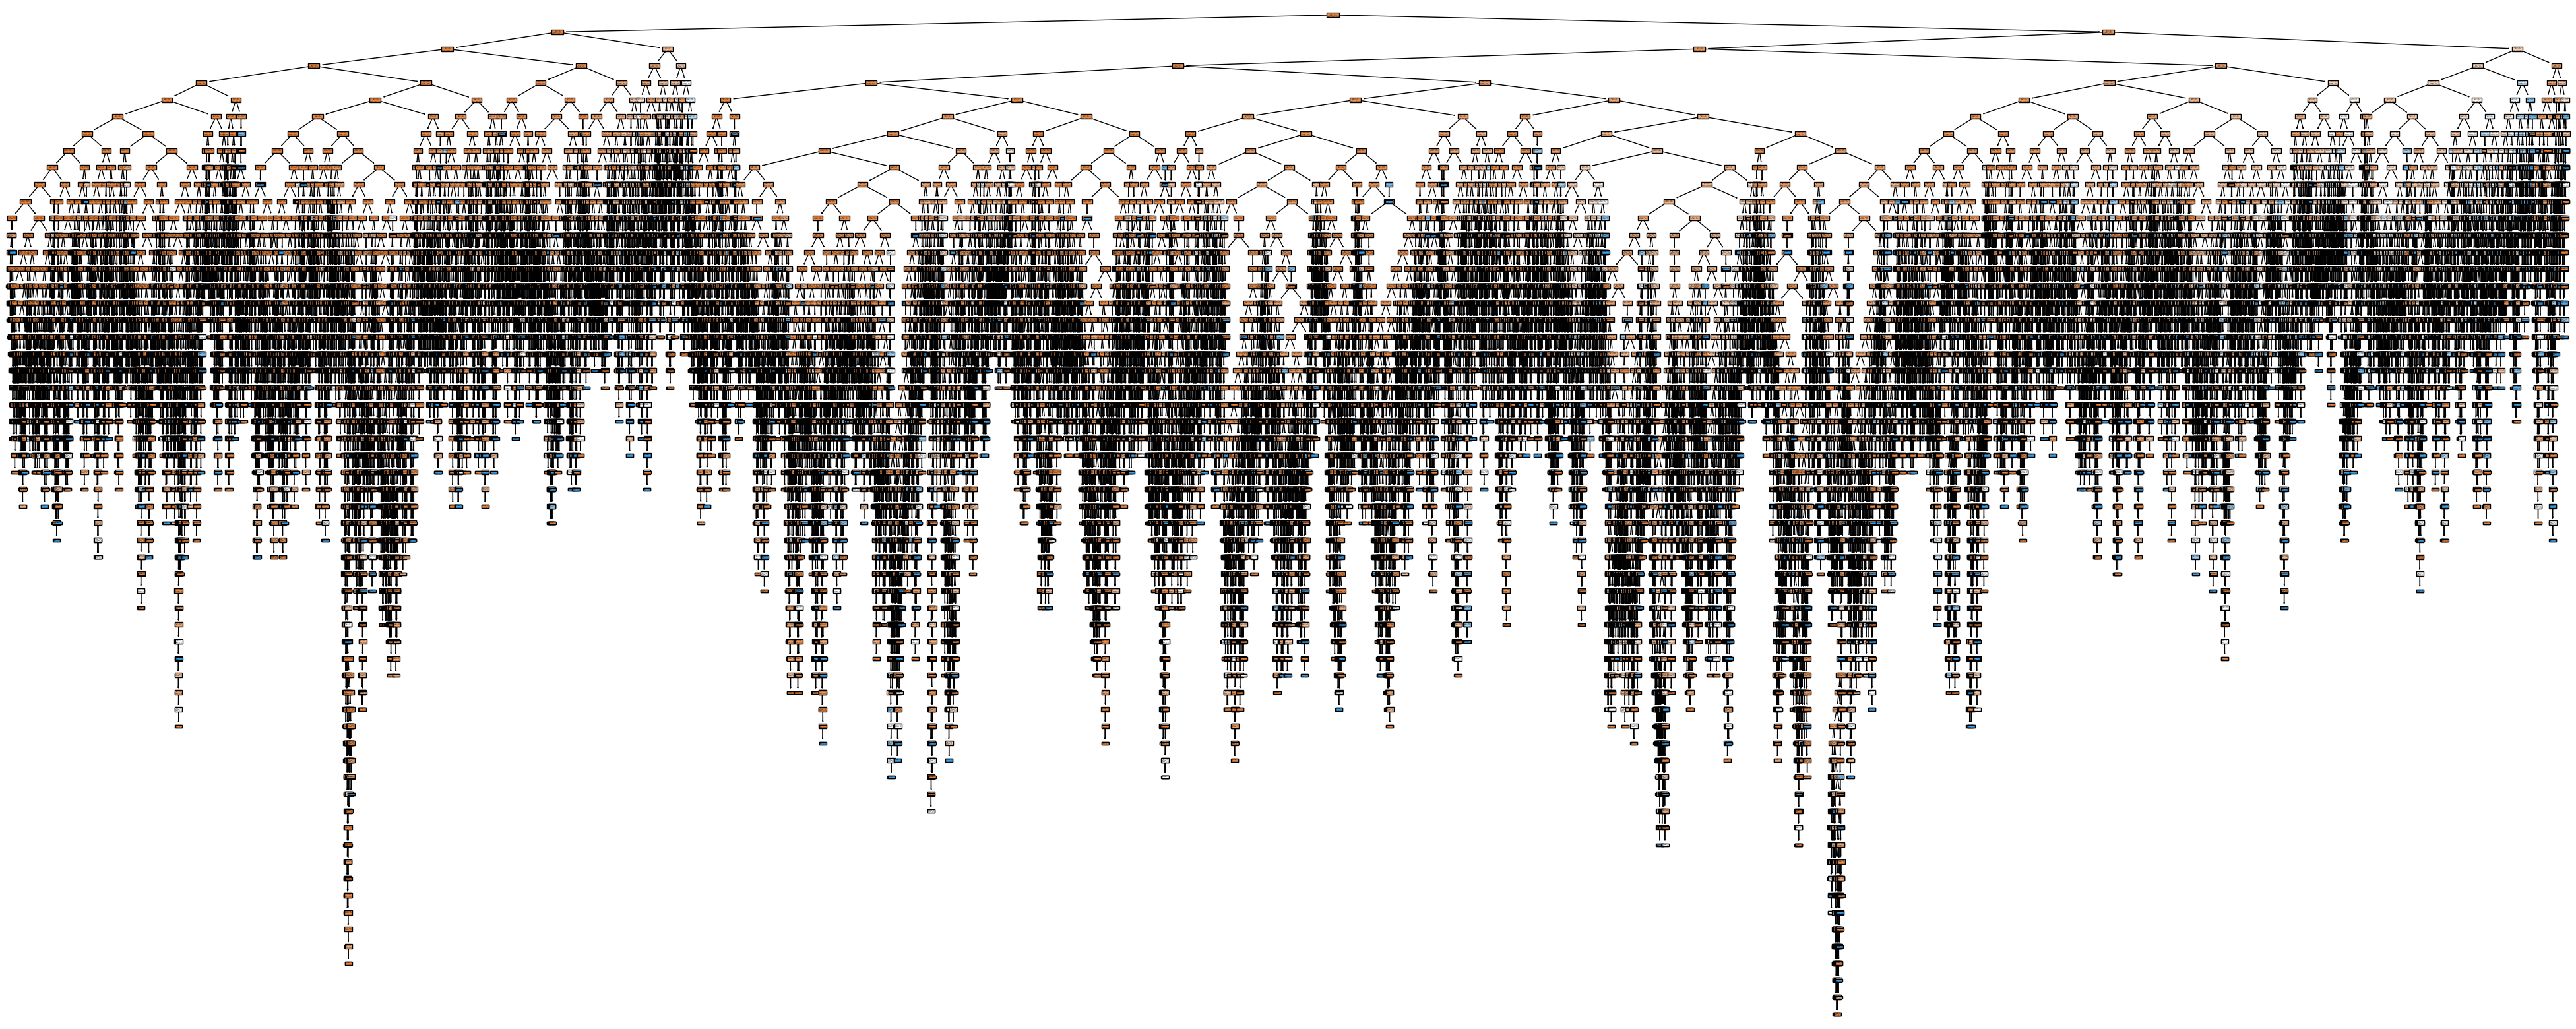

In [74]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 20))
plot_tree(dtree, filled=True)
plt.show()